## Importación de librería

In [4]:
import pandas as pd
visits_data=pd.read_csv('visits_log_us.csv')
orders_data=pd.read_csv('orders_log_us.csv')
costs_data=pd.read_csv('costs_us.csv')

## Información general de datos

In [5]:
visits_data.info()
print("\nMuestra al azar de datos de visitas")
print(visits_data.sample(5))
orders_data.info()
print("\nMuestra al azar de datos de pedidos")
print(orders_data.sample(5))
costs_data.info()
print("\nMuestra al azar de datos de gastos de marketing")
print(costs_data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Muestra al azar de datos de visitas
         Device               End Ts  Source Id             Start Ts  \
3313    desktop  2017-07-21 12:28:00          2  2017-07-21 11:16:00   
190056    touch  2017-09-04 23:02:00          1  2017-09-04 23:01:00   
29692   desktop  2017-10-23 23:52:00          1  2017-10-23 23:40:00   
235742    touch  2018-02-27 09:03:00          4  2018-02-27 08:53:00   
299509    touch  2018-01-05 15:36:00          3  2018-01-05 15:34:00   

                         Uid  
3313     9516602206903407275  
190056   9287512

In [6]:
# Contar duplicados explícitos
print(f"Duplicados en dataframe de visitas: {visits_data.duplicated().sum()}")
print(f"Duplicados en dataframe de pedidos: {orders_data.duplicated().sum()}")
print(f"Duplicados en dataframe de gastos de marketing: {costs_data.duplicated().sum()}")

#Contar valores nulos
print(f"\nValores nulos en dataframe de visitas: {visits_data.isna().sum()}")
print(f"Valores nulos en dataframe de pedidos: {orders_data.isna().sum()}")
print(f"Valores nulos en dataframe de gastos de marketing: {costs_data.isna().sum()}")

Duplicados en dataframe de visitas: 0
Duplicados en dataframe de pedidos: 0
Duplicados en dataframe de gastos de marketing: 0

Valores nulos en dataframe de visitas: Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Valores nulos en dataframe de pedidos: Buy Ts     0
Revenue    0
Uid        0
dtype: int64
Valores nulos en dataframe de gastos de marketing: source_id    0
dt           0
costs        0
dtype: int64


## Conclusión de revisión de datos
Se observa que los datos están bien identificados como obj, int o float de acuerdo a como corresponde y no hay datos faltantes.En las muestras no se observan problemas en la escritura de los nombres.
Tampoco se encuentran duplicados. Sólo queda convertir la de has a datetime.

### Conversión de fechas al formato datetime

In [7]:
#Conversión de fecha de inicio y término de sesión
visits_data['Start Ts'] = pd.to_datetime(visits_data['Start Ts'])
visits_data['End Ts'] = pd.to_datetime(visits_data['End Ts'])

#Conversión de fecha de pedido
orders_data['Buy Ts'] = pd.to_datetime(orders_data['Buy Ts'])

#Conversión de fecha en gastos de marketing
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

In [8]:
#Comprobació
print(visits_data.dtypes)
print(f"\n{orders_data.dtypes}")
print(f"\n{costs_data.dtypes}")

Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


## Análisis de datos de visitas

In [9]:
# Crear columna de fecha
visits_data['date'] = visits_data['Start Ts'].dt.date

# Usuarios únicos por día
daily_users = visits_data.groupby('date')['Uid'].nunique()
print(f'Sesiones por día:{ daily_users.describe()}')


# Usuarios únicos por semana
visits_data['week'] = visits_data['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_users = visits_data.groupby('week')['Uid'].nunique()
print(f'\n Sesiones por semana: {weekly_users.describe()}')

# Usuarios únicos por mes
visits_data['month'] = visits_data['Start Ts'].dt.to_period('M').astype(str)
monthly_users = visits_data.groupby('month')['Uid'].nunique()
print(f'\n Sesiones por mes:{monthly_users.describe()}')



Sesiones por día:count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: Uid, dtype: float64

 Sesiones por semana: count       53.000000
mean      5716.245283
std       2049.898027
min       2021.000000
25%       4128.000000
50%       5740.000000
75%       7401.000000
max      10586.000000
Name: Uid, dtype: float64

 Sesiones por mes:count       12.000000
mean     23228.416667
std       7546.380462
min      11631.000000
25%      17777.000000
50%      24240.500000
75%      28984.750000
max      32797.000000
Name: Uid, dtype: float64


### Sesiones por día

In [10]:
daily_sessions = visits_data.groupby('date').size()
print(daily_sessions.describe())

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
dtype: float64


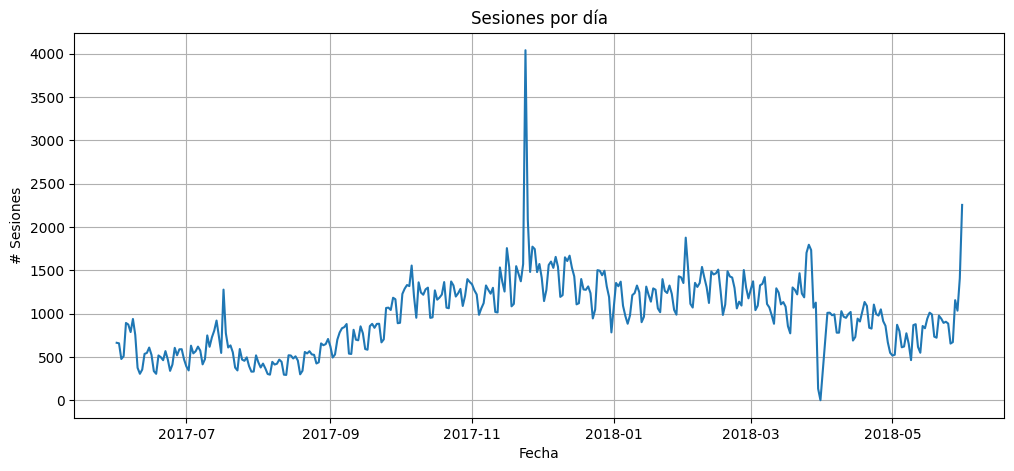

In [11]:
import matplotlib.pyplot as plt
daily_sessions.plot(figsize=(12, 5), title='Sesiones por día')
plt.ylabel('# Sesiones')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

### Duración de cada sesión

In [12]:
visits_data['session_duration'] = (visits_data['End Ts'] - visits_data['Start Ts']).dt.total_seconds() / 60  # en minutos
print(f"{visits_data['session_duration'].mean():.2f}")

10.72


### Frecuencia en que los usuarios regresan

In [13]:
visits_sorted = visits_data.sort_values(by=['Uid', 'Start Ts'])
visits_sorted['last_session_time'] = visits_sorted.groupby('Uid')['Start Ts'].shift()
visits_sorted['returning_time'] = (visits_sorted['Start Ts'] - visits_sorted['last_session_time']).dt.days

# Días en los que regresan
print(visits_sorted['returning_time'].dropna().describe())

count    131231.000000
mean         27.676837
std          49.693727
min           0.000000
25%           0.000000
50%           4.000000
75%          31.000000
max         362.000000
Name: returning_time, dtype: float64


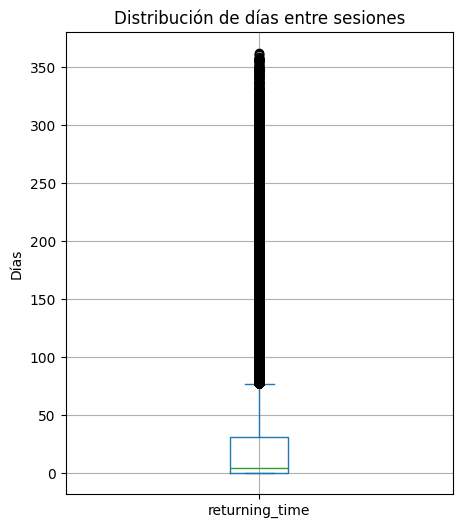

In [14]:
visits_sorted['returning_time'].dropna().plot.box(figsize=(5, 6), title='Distribución de días entre sesiones')
plt.ylabel('Días')
plt.grid(True)
plt.show()

## Análisis de Ventas

### ¿Cuándo empieza la gente a comprar? 

In [15]:
# Primera visita por usuario
first_visits = visits_data.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.columns = ['Uid', 'first_visit']

# Primera compra 
first_orders = orders_data.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_purchase']
conversion_data = pd.merge(first_visits, first_orders, on='Uid', how='inner')

# Días hasta la conversión
conversion_data['conversion_days'] = (conversion_data['first_purchase'] - conversion_data['first_visit']).dt.days
print(conversion_data['conversion_days'].describe())

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_days, dtype: float64


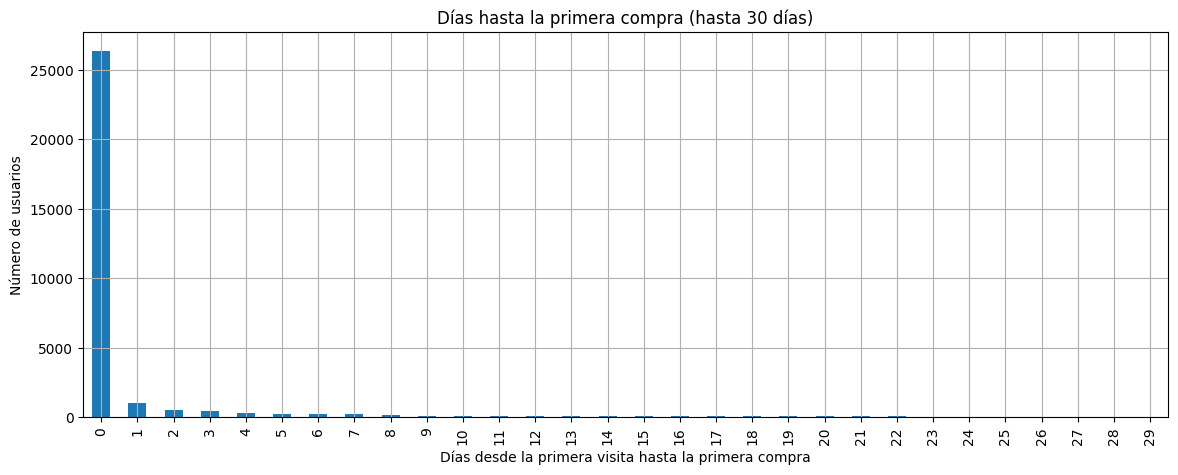

In [16]:
conversion_distribution = conversion_data['conversion_days'].value_counts().sort_index()
conversion_distribution[:30].plot(kind='bar', figsize=(14, 5), title='Días hasta la primera compra (hasta 30 días)')
plt.xlabel('Días desde la primera visita hasta la primera compra')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.show()

### Pedidos durante un periodo de tiempo

In [17]:
# Crear columna de fecha
orders_data['order_date'] = orders_data['Buy Ts'].dt.date

# Pedidos por día
daily_orders = orders_data.groupby('order_date').size()
print(f'Pedidos por día: {daily_orders.describe()}')

# Pedidos por mes
orders_data['order_month'] = orders_data['Buy Ts'].dt.to_period('M').astype(str)
monthly_orders = orders_data.groupby('order_month').size()
print(f'\n Pedidos por mes: {monthly_orders.describe()}')

Pedidos por día: count    364.000000
mean     138.502747
std       76.858480
min        1.000000
25%       82.750000
50%      136.000000
75%      177.000000
max      814.000000
dtype: float64

 Pedidos por mes: count      13.000000
mean     3878.076923
std      1858.113401
min         1.000000
25%      2363.000000
50%      4346.000000
75%      5326.000000
max      6218.000000
dtype: float64


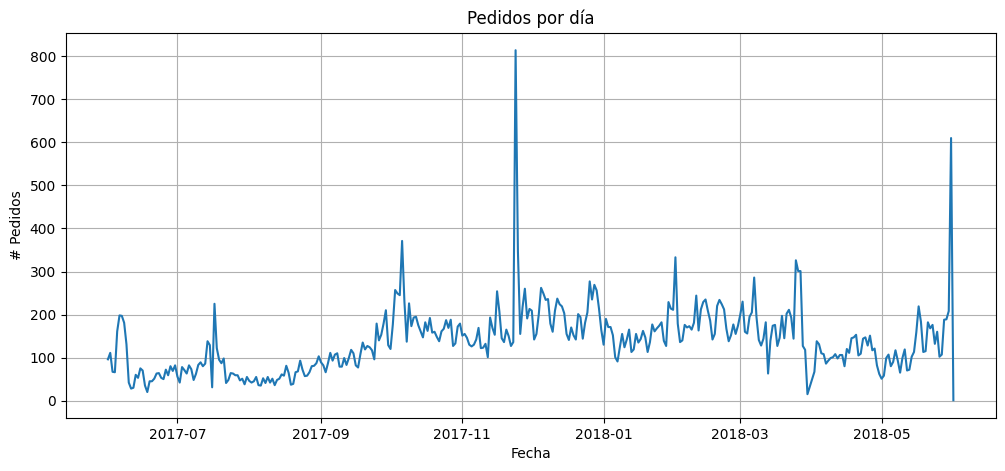

In [18]:
daily_orders.plot(figsize=(12, 5), title='Pedidos por día')
plt.ylabel('# Pedidos')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

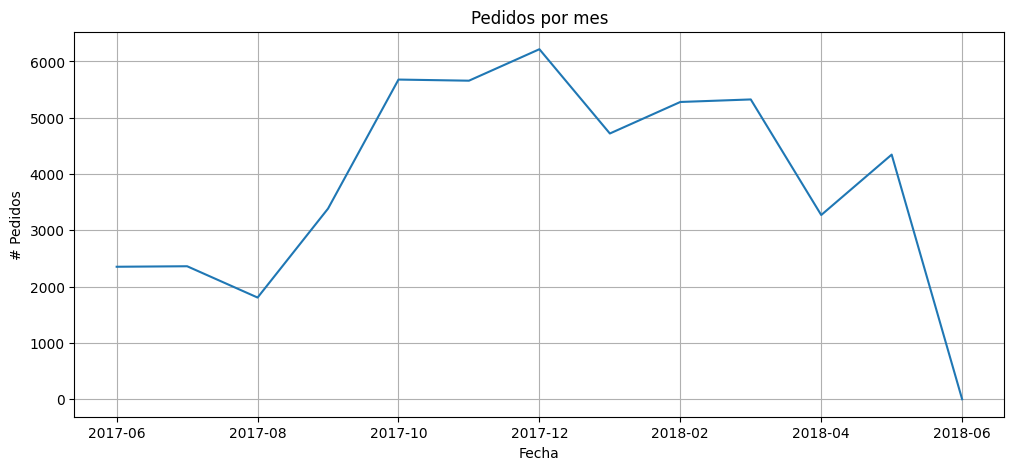

In [19]:
monthly_orders.plot(figsize=(12, 5), title='Pedidos por mes')
plt.ylabel('# Pedidos')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

### Tamaño promedio de compra

In [20]:
avg_order = orders_data['Revenue'].mean()
print(f"El tamaño promedio de compra es ${avg_order:.2f}")

El tamaño promedio de compra es $5.00


### ¿Cuánto dinero traen? (LTV)

In [21]:
ltv = orders_data.groupby('Uid')['Revenue'].sum().reset_index()
ltv.columns = ['Uid', 'LTV']
print(ltv['LTV'].describe())

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: LTV, dtype: float64


## Marketing

### Dinero gastado  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [22]:
total_marketing = costs_data['costs'].sum()
print(f"Gasto total en marketing: ${total_marketing:,.2f}")

Gasto total en marketing: $329,131.62


In [23]:
spend_by_source = costs_data.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(spend_by_source)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


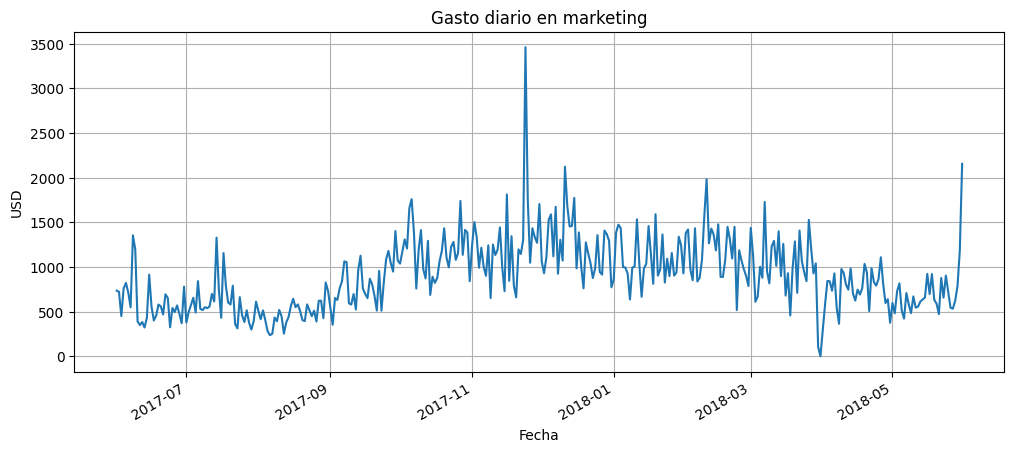

In [24]:
daily_spend = costs_data.groupby('dt')['costs'].sum()

daily_spend.plot(figsize=(12, 5), title='Gasto diario en marketing')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.grid(True)
plt.show()

### Costo de adquisición de clientes de cada una de las fuentes

In [25]:
# Usuarios que compraron
buyers = orders_data['Uid'].unique()

# Primera visita con fuente por usuario
first_visits_sources = visits_data.groupby('Uid')[['Start Ts', 'Source Id']].min().reset_index()
first_visits_sources.columns = ['Uid', 'first_visit', 'source_id']

buyers_sources = first_visits_sources[first_visits_sources['Uid'].isin(buyers)]

# Número de clientes por fuente
clients_per_source = buyers_sources.groupby('source_id')['Uid'].nunique()

In [26]:
spend_per_source = costs_data.groupby('source_id')['costs'].sum()
cac_per_source = spend_per_source / clients_per_source
cac_per_source = cac_per_source.dropna().sort_values()
print(cac_per_source)

source_id
1      2.918642
10     6.579085
4      7.504743
2      8.022121
9     10.469620
5     10.608137
3     14.691925
dtype: float64


### ROMI Retorno de la Inversión en Marketing

In [27]:
# LTV por usuario
ltv_per_user = orders_data.groupby('Uid')['Revenue'].sum()

# Asociar fuente con ingresos
buyers_sources = buyers_sources.merge(ltv_per_user, on='Uid')

# Ingresos por fuente
revenue_per_source = buyers_sources.groupby('source_id')['Revenue'].sum()
romi_per_source = (revenue_per_source - spend_per_source) / spend_per_source
romi_per_source = romi_per_source.dropna().sort_values(ascending=False)
print(romi_per_source)

source_id
1     3.878321
2     0.007422
4    -0.398990
5    -0.557166
10   -0.579867
9    -0.660320
3    -0.693219
dtype: float64


# Conclusión

## Análisis de visitas

**Uso por frecuencia**
* Día
	En promedio, alrededor de 907 usuarios únicos acceden al sitio cada día. El mínimo fue 1 y el máximo 3,319.
	
* Semana 
	Promedio de 5,716 usuarios únicos por semana, con un mínimo de 2,021 y un máximo de 10,586.
*Mes
	Promedio mensual de 23,228 usuarios únicos, con un mínimo de 11,631 y un máximo de 32,797.

**Sesiones por día**

Dado que un usuario puede tener múltiples sesiones por día, el número de sesiones diarias es ligeramente mayor, teniendo un promedio de ~987 sesiones por día.
Al principio del período (mediados de 2017), el número de sesiones diarias era relativamente bajo, a menudo por debajo de 500.
El máximo es de 4,042. Este pico parece ser a finales de 2017 (alrededor de noviembre). Podría ser debido a un evento significativo o una campaña de marketing exitosa.
Después de ese pico se mantienen por arriba de 1000 pero para abril del 2018 parecen caer a por debajo de 1000.
Se observa una caída en el 2018 por lo que parece ser abril, que sería el mín de 1 pero puede ser un error o un día que tuvieron algún mantenimiento y no hubo actividad.

**Duración de las sesiones**

El tiempo promedio de duración es de ~10 min.

**Frecuencia en que los usuarios se reconectan**

En promedio, los usuarios vuelven después de ~27 días.

El mínimo es 0 días, lo que indica que algunos usuarios regresan el mismo día.

El máximo es de 362 días, lo cual representa una retención muy tardía o esporádica.

Esto muestra una mezcla de usuarios frecuentes y otros más esporádicos. El valor de la mediana (4 días) sugiere que al menos la mitad de los usuarios vuelven dentro de la primera semana.
A pesar de la concentración inicial, el bigote superior de la caja (hasta aproximadamente 31 días) y la gran cantidad de puntos individuales por encima de él (los "outliers" o valores atípicos) indican que hay muchos usuarios que tardan mucho más en regresar.

## Ventas

**¿Cuándo empieza la gente a comprar?**

El pico más alto y abrumador en la gráfica se produce en el Día 0. Esto significa que la gran mayoría de los usuarios realizan su primera compra el mismo día en que visitan por primera vez.
Las estadísticas lo confirman:
min = 0.00
25% = 0.00
50% = 0.00 Esto es una observación muy potente: la mitad de los usuarios que eventualmente compran, lo hacen en el mismo día de su primera visita.
mean = 16.72 días, mientras que la 50% (mediana) = 0.00 días.


**Pedidos durante un periodo de tiempo**

* Día
	La media de 138.5 pedidos por día y la desviación estándar de 76.85. 
	La mayoría de los días se sitúan en el rango de 80 a 180 pedidos (25% en 82.75 y 75% en 177).
Hay un pico a finales de 2017 (Noviembre), alcanzando un máximo de 814 pedidos en un solo día.
El min de 1.0 pedido sugiere que hubo días con una actividad extremadamente baja o casi nula.

* Mes
La gráfica muestra un crecimiento constante en el número de pedidos mensuales desde junio de 2017 hasta diciembre de 2017, donde alcanza su pico máximo de 6218 pedidos. Después de diciembre de 2017, hay una ligera disminución en enero de 2018, seguida de una recuperación y estabilidad en febrero y marzo.
El dato de min de 1.0 en los pedidos por mes es extremadamente inusual y sugiere que el último mes (junio de 2018) no está completo o hay un problema con los datos de ese mes.

**Tamaño promedio de compra**
Un promedio de $5.00 por orden es un valor relativamente bajo podría ser que el negocio probablemente depende de un gran volumen de transacciones para generar ingresos significativos.

**Lifetime Value (LTV) de los Usuarios**

 La desviación estándar es extremadamente alta ($88.12) en comparación con la media ($6.90). Esto es una señal muy fuerte de que la distribución del LTV está muy sesgada
Un LTV mínimo de $0.00 para usuarios con compras puede ser un indicio de:
Órdenes canceladas sin costo.
Órdenes de prueba o gratuitas.
Un error
Hay al menos un usuario (o muy pocos) que han generado una cantidad masiva de ingresos ($11,810.18), lo que arrastra la media hacia arriba y explica la alta desviación estándar.

## Marketing 

**Fuente 1**
Más eficiente: tiene el CAC más bajo ($2.92) y el ROMI más alto (+3.88).

Claramente rentable: por cada dólar invertido, recupera casi 5.

 **Fuente 2**
Es apenas rentable
CAC moderado ($8.02), ROMI casi neutro (0.007).

Puede mantenerse, pero conviene revisar su estrategia o contenidos.

**Fuentes 3, 4, 5, 9 y 10: negativas**
Todas tienen ROMI negativo, es decir, pierden dinero.

Fuente 3 es especialmente crítica: tuvo el mayor gasto y el peor ROMI.

Estas fuentes deberían optimizarse, redirigir presupuesto o cancelarse, a menos que su beneficio no monetario (por ejemplo, branding) lo justifique.

**Recomendación para el equipo de marketing**

* Deberían priorizar la conversión inmediata y los primeros días. Los esfuerzos para los usuarios que no convierten rápidamente deben ser diferentes y posiblemente más enfocados en nutrir el interés a largo plazo o en ofertas muy específicas.
* Para la mayoría de los usuarios con LTV bajo, las estrategias de retención deben ser costo-efectivas para fomentar compras repetidas.
* Estrategias de Re-engagement: Para los usuarios con LTV muy bajo (o el min = 0), es importante entender por qué no están gastando y cómo incentivarlos.
* Invertir más en la fuente 1, ya que es claramente rentable.
* Mantener la inversión en la Fuente 2, pero con cautela.Tiene un CAC aceptable ($8.02).Su ROMI es casi nulo (0.007), lo que indica que se recupera apenas el gasto.
* Revisar o reducir presupuesto para fuentes con ROMI negativo, especialmente la 3.